## Q1

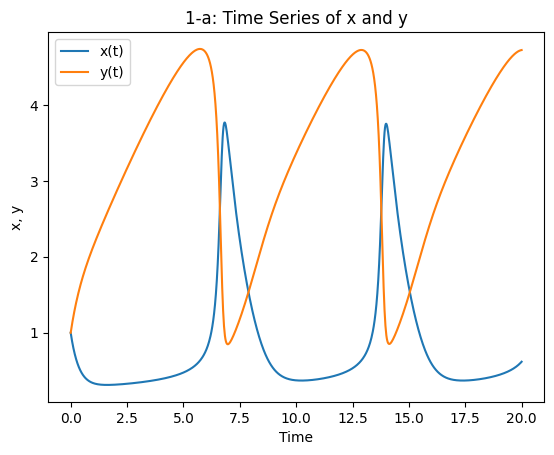

Coordinates of the starting point: [0.61843 4.72089]
Oscillation period: 7.16


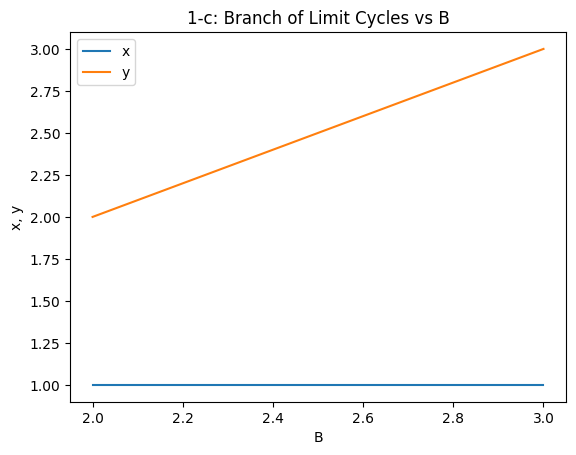

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from main import ode_solver, numerical_shooting_bru, solve_limit_cycles

def brusselator_system(xy, t, A, B):
    x, y = xy
    dxdt = A + x**2 * y - (B + 1) * x
    dydt = B * x - x**2 * y
    return [dxdt, dydt]

def plot_part_a():
    A = 1
    B = 3
    xy0 = [1, 1]
    t_span = np.linspace(0, 20, 1001)

    t, solution = ode_solver(brusselator_system, xy0, t_span, A, B)
    x_solution = solution[:, 0]
    y_solution = solution[:, 1]

    plt.plot(t, x_solution, label='x(t)')
    plt.plot(t, y_solution, label='y(t)')
    plt.xlabel('Time')
    plt.ylabel('x, y')
    plt.title('1-a: Time Series of x and y')
    plt.legend()
    plt.show()

def plot_part_b():
    A = 1
    B = 3
    t_span = np.linspace(0, 20, 1001)
    initial_conditions = np.array([0.61843, 4.72089])
    initial_guess = np.array([0.4091137, 4.1735098])

    conditions, period = numerical_shooting_bru(brusselator_system, t_span, initial_conditions, initial_guess, A, B)
    print("Coordinates of the starting point:", conditions)
    print("Oscillation period:", round(period, 2))

def plot_part_c():
    A = 1
    B_values = np.linspace(2, 3, 101)
    B, x, y = solve_limit_cycles(A, B_values)

    plt.plot(B, x, label='x')
    plt.plot(B, y, label='y')
    plt.xlabel('B')
    plt.ylabel('x, y')
    plt.title('1-c: Branch of Limit Cycles vs B')
    plt.legend()
    plt.show()

if __name__ == '__main__':
    plot_part_a()
    plot_part_b()
    plot_part_c()


## Q2

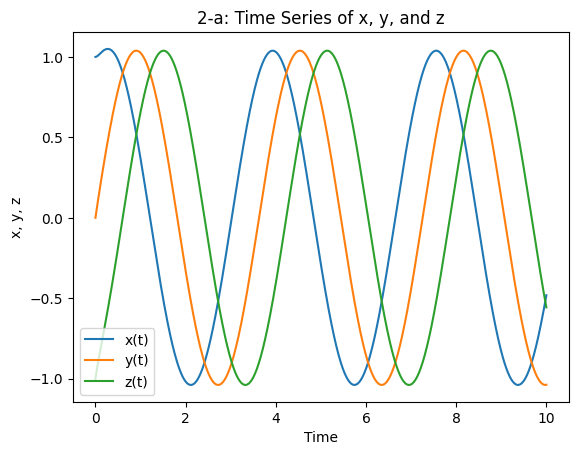

Iteration 0: residual = [0.18726744 0.03781869 0.05585901]
Iteration 1: residual = [0.16065778 0.01787594 0.07684925]
Iteration 2: residual = [0.1418376  0.00489515 0.08843886]
Iteration 3: residual = [0.12823736 0.00289369 0.09366076]
Iteration 4: residual = [0.11793944 0.00709217 0.0946551 ]
Iteration 5: residual = [0.1095718  0.00897007 0.09289871]
Iteration 6: residual = [0.10220323 0.00944822 0.0893861 ]
Iteration 7: residual = [0.09524822 0.0091462  0.08476817]
Iteration 8: residual = [0.08837946 0.00845161 0.07945888]
Iteration 9: residual = [0.08145496 0.00759045 0.07372165]
Iteration 10: residual = [0.07445416 0.00668568 0.06773197]
Iteration 11: residual = [0.06743167 0.0058012  0.06162297]
Iteration 12: residual = [0.06048095 0.00496977 0.05551001]
Iteration 13: residual = [0.05371103 0.00420871 0.04950217]
Iteration 14: residual = [0.04722884 0.003527   0.0437018 ]
Iteration 15: residual = [0.04112969 0.00292818 0.03820149]
Iteration 16: residual = [0.03548933 0.00241156 0.

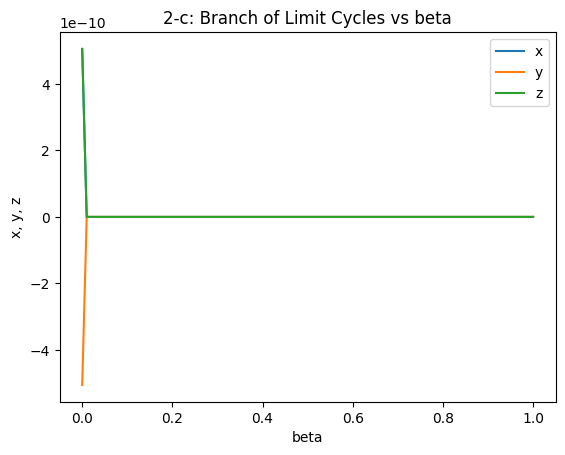

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp
from scipy.optimize import root, minimize
from scipy.signal import find_peaks
from main import numerical_shooting, compute_period
# Define the ODE system for Q2
def hopf_bifurcation_system(xyz, t, beta):
    x, y, z = xyz
    dxdt = beta * x - y - z + x * (x**2 + y**2 + z**2) - x * (x**2 + y**2 + z**2)**2
    dydt = x + beta * y - z + y * (x**2 + y**2 + z**2) - y * (x**2 + y**2 + z**2)**2
    dzdt = x + y + beta * z + z * (x**2 + y**2 + z**2) - z * (x**2 + y**2 + z**2)**2
    return [dxdt, dydt, dzdt]

# Part (a)
def part_a():
    beta = 1
    xyz0 = [1, 0, -1]
    t_span = np.linspace(0, 10, 1001)

    solution = odeint(hopf_bifurcation_system, xyz0, t_span, args=(beta,))
    x_solution = solution[:, 0]
    y_solution = solution[:, 1]
    z_solution = solution[:, 2]

    plt.plot(t_span, x_solution, label='x(t)')
    plt.plot(t_span, y_solution, label='y(t)')
    plt.plot(t_span, z_solution, label='z(t)')
    plt.xlabel('Time')
    plt.ylabel('x, y, z')
    plt.title('2-a: Time Series of x, y, and z')
    plt.legend()
    plt.show()

    return t_span, solution

# Part (b)
def part_b(t_span_a, solution_a):
    beta = 1
    t_span = np.linspace(0, 10, 1001)
    # Initial guess
    initial_conditions = np.array([1.2, 0.1, -0.9], dtype=float)
    initial_guess = solution_a[-1]

    initial_conditions, period = numerical_shooting(hopf_bifurcation_system, t_span, initial_conditions, initial_guess=solution_a[-1], beta=1)

    print("Coordinates of the starting point:", initial_conditions)
    print("Oscillation period:", round(period, 2))

# Part (c)
def part_c():
    def equations(xyz, beta):
        x, y, z = xyz
        return [beta * x - y - z + x * (x**2 + y**2 + z**2) - x * (x**2 + y**2 + z**2)**2,
                x + beta * y - z + y * (x**2 + y**2 + z**2) - y * (x**2 + y**2 + z**2)**2,
                x + y + beta * z + z * (x**2 + y**2 + z**2) - z * (x**2 + y**2 + z**2)**2]

    beta_values = np.linspace(0, 1, 101)
    t_span = np.linspace(0, 100, 1001)
    initial_condition = [1, 0, -1]

    x_values = []
    y_values = []
    z_values = []
    for beta in beta_values:
        xyz = root(equations, initial_condition, args=(beta,)).x
        x_values.append(xyz[0])
        y_values.append(xyz[1])
        z_values.append(xyz[2])

    plt.plot(beta_values, x_values, label='x')
    plt.plot(beta_values, y_values, label='y')
    plt.plot(beta_values, z_values, label='z')
    plt.xlabel('beta')
    plt.ylabel('x, y, z')
    plt.title('2-c: Branch of Limit Cycles vs beta')
    plt.legend()
    plt.show()

# Run parts (a), (b), and (c)
t_span_a, solution_a = part_a()
part_b(t_span_a, solution_a)
part_c()

## Q3

u(0) with root finding (sigma=0.5, grid_points=51) = -0.3049
u(0) with sparse matrix (sigma=0.1, grid_points=51) = 0.4606


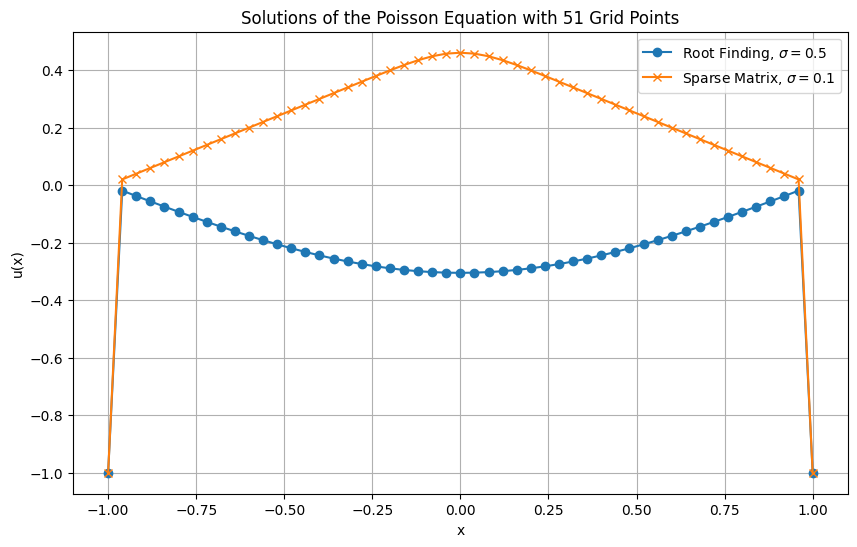

Root-finding method took 0.1124 seconds.
Sparse matrix method took 0.0000 seconds.


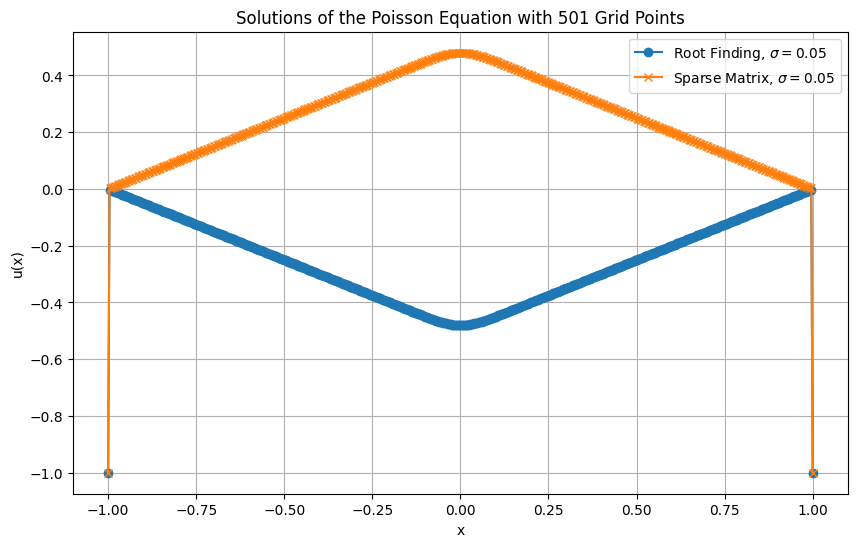

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import time
from main import finite_difference_poisson_root, finite_difference_poisson_sparse

def part_a():
    """Part (a): Solve the Poisson equation with a given sigma and grid points."""
    sigma = 0.5
    grid_points = 51

    x_root, u_root = finite_difference_poisson_root(sigma, grid_points)
    print(f"u(0) with root finding (sigma=0.5, grid_points=51) = {u_root[grid_points//2]:.4f}")

    sigma_sparse = 0.1
    x_sparse, u_sparse = finite_difference_poisson_sparse(sigma_sparse, grid_points)
    print(f"u(0) with sparse matrix (sigma=0.1, grid_points=51) = {u_sparse[grid_points//2]:.4f}")

    plt.figure(figsize=(10, 6))
    plt.plot(x_root, u_root, label=r'Root Finding, $\sigma=0.5$', marker='o')
    plt.plot(x_sparse, u_sparse, label=r'Sparse Matrix, $\sigma=0.1$', marker='x')
    plt.xlabel('x')
    plt.ylabel('u(x)')
    plt.title('Solutions of the Poisson Equation with 51 Grid Points')
    plt.legend()
    plt.grid(True)
    plt.show()

def part_b():
    """Part (b): Evaluate the performance of the finite difference methods."""
    grid_points_b = 501
    sigma_b_root = 0.05
    sigma_b_sparse = 0.05

    # Timing the root-finding method
    start_time = time.time()
    x_b_root, u_b_root = finite_difference_poisson_root(sigma_b_root, grid_points_b)
    end_time = time.time()
    print(f"Root-finding method took {end_time - start_time:.4f} seconds.")

    # Timing the sparse matrix method
    start_time = time.time()
    x_b_sparse, u_b_sparse = finite_difference_poisson_sparse(sigma_b_sparse, grid_points_b)
    end_time = time.time()
    print(f"Sparse matrix method took {end_time - start_time:.4f} seconds.")

    plt.figure(figsize=(10, 6))
    plt.plot(x_b_root, u_b_root, label=r'Root Finding, $\sigma=0.05$', marker='o')
    plt.plot(x_b_sparse, u_b_sparse, label=r'Sparse Matrix, $\sigma=0.05$', marker='x')
    plt.xlabel('x')
    plt.ylabel('u(x)')
    plt.title('Solutions of the Poisson Equation with 501 Grid Points')
    plt.legend()
    plt.grid(True)
    plt.show()

def main():
    part_a()
    part_b()

if __name__ == "__main__":
    main()



## Q6

Maximum value of u for P=1: 0.1235
Maximum value of u for P=10: 1.2344
Maximum value of u for P=50: 6.1719


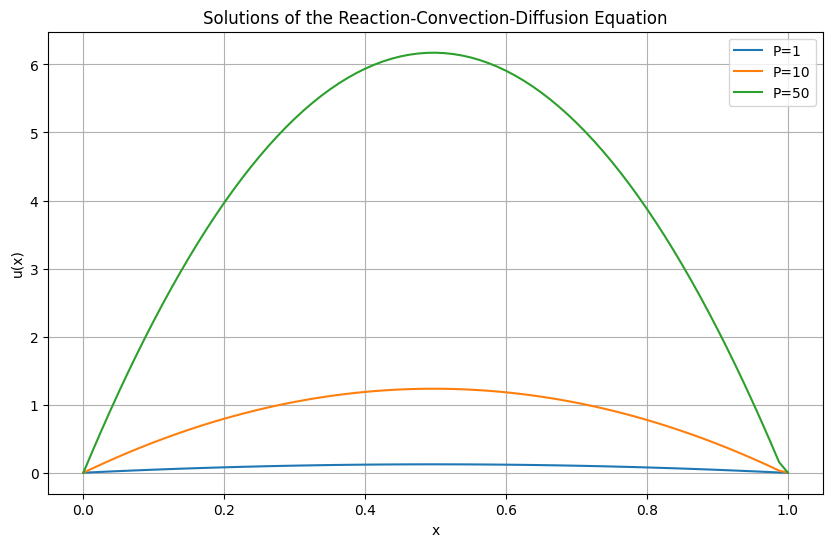

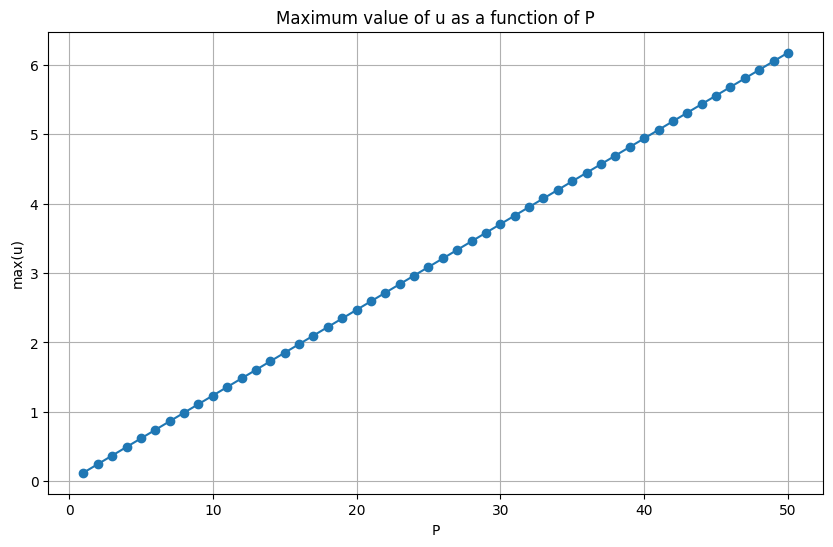

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from main import finite_difference_rcd

def part_a():
    """Solve the reaction-convection-diffusion equation for various P values and plot the solutions."""
    # Values of P to analyze
    P_values = [1, 10, 50]

    # Dictionary to store solutions for different P values
    solutions = {}
    for P in P_values:
        x, u = finite_difference_rcd(P)
        solutions[P] = u
        print(f"Maximum value of u for P={P}: {np.max(u):.4f}")

    # Plot the solutions for each P
    plt.figure(figsize=(10, 6))
    for P in P_values:
        plt.plot(x, solutions[P], label=f'P={P}')
    plt.xlabel('x')
    plt.ylabel('u(x)')
    plt.title('Solutions of the Reaction-Convection-Diffusion Equation')
    plt.legend()
    plt.grid(True)
    plt.show()

def part_b():
    """Evaluate the maximum value of u as a function of P and plot the results."""
    from scipy.optimize import root_scalar

    def max_u_vs_P(P):
        _, u = finite_difference_rcd(P)
        return np.max(u)

    P_range = np.linspace(1, 50, 50)
    max_u_values = [max_u_vs_P(P) for P in P_range]

    # Plot the maximum value of u as a function of P
    plt.figure(figsize=(10, 6))
    plt.plot(P_range, max_u_values, marker='o')
    plt.xlabel('P')
    plt.ylabel('max(u)')
    plt.title('Maximum value of u as a function of P')
    plt.grid(True)
    plt.show()

def main():
    part_a()
    part_b()

if __name__ == "__main__":
    main()


## Description of the key software design decisions

Introduction

For this assignment, modularity, efficiency, and clarity were used to guide the design and execution of the software for solving differential equations. The software is set up to deal with different problems, such as initial-value problems (IVPs), boundary-value problems (BVPs), and numerical continuation methods. It does all of these problems using the right numerical methods. Tools and methods like SciPy and NumPy were chosen because they are reliable, simple to use, and come with much support.

Group A: Methods for ODE Initial-Value Problems

I used the Euler and Runge-Kutta methods (RK4) to solve ODE initial-value problems. These methods were picked because they are easy to understand and are commonly used in numerical analysis. The Euler method is a first-order method, which means it is easy to understand and code. The Euler method is a good way to learn about numerical ODE solvers, even though it is less efficient than higher-order methods. It can help with problems that do not need to be very precise or where the cost of computing needs to be kept as low as possible. The fourth-order Runge-Kutta method (RK4) was used because it strikes a good mix between speed and accuracy. Many people use RK4 because it is much more accurate than the Euler method without making calculations much harder. Because of this, it can be used to solve many different IVP issues. Both ways were made into separate functions that take in the differential equation, the starting conditions, and the amount of time. By changing the function call, users can switch between different methods, which makes the software more flexible and easy to use. This modular design makes upkeep and bug fixing easier since changes to one method do not affect the others.

Group B: Methods for Numerical Continuation

To keep track of how differential equation solutions change when constant changes occur, numerical continuation methods were put in place. In particular, continuation with natural parameters was used. It was decided to use natural parameter continuation because it can handle smooth changes in the parameter and is easy to set up using root-finding methods. This method works well for finding solution branches and learning about bifurcation events. SciPy's root function was used to make it work. This function is reliable and good at solving nonlinear problems. The continuation method was made to work with the ODE solutions without any problems. It solves the ODE repeatedly for increasing parameter values and saves the answers. Since the software stores the results in a structured way, it can draw solution branches and find important places like bifurcations. This combination ensures that users can do in-depth studies of parameters without making big changes to how they work. The step size used in the continuing process was carefully thought out to ensure the numbers would stay stable and correct. Adaptive step sizing was a way to deal with areas where the answer changes quickly to ensure that the continuation method stays effective and accurate across the parameters.

Group C: Methods for ODE Boundary-Value Problems

I used SciPy's root-finding tools and sparse matrix solvers to make finite-difference methods work for boundary-value problems. I picked the finite-difference method to discretise the differential equation, which turns it into a set of algebraic equations that can be solved using numbers. This method can be used with many different differential equations and boundary conditions. The set of algebraic equations that came up because of the finite-difference discretisation was solved with SciPy's root function. The root function is reliable and works with many different methods for solving nonlinear equations, making it flexible and useful. This choice was due to the need for a solid, tried-and-true solution that could deal with the discretised equations' nonlinearity. SciPy's sparse matrix solvers (solve and dialogues) were used to solve problems that led to big sparse systems. Sparse matrix techniques cut down memory use and computation time by a large amount, making it possible to answer big problems quickly. The solution can work with bigger grids without slowing down because it uses the sparsity of the finite-difference matrix. The differential equation, boundary conditions, and grid points were put into the BVP solvers so that they could work. The user did not have to know how to use sparse matrices and efficient methods. 

Discussion

NumPy arrays are good for doing calculations with numbers because they offer optimised processes and work with SciPy's functions. They make it easy to work with grid-based data and matrices, which are popular in numerical solvers and finite-difference methods. Carefully write function inputs and outputs to avoid mistakes and ensure they work together. Using uniform data types makes it easier to keep numbers accurate and stable. It also makes the code easy to read and fix bugs. Bugs caused by different data types are less likely when the software uses common data types.
We picked SciPy's advanced numerical solvers (root, solv) to work with large sparse matrices and nonlinear systems. SciPy's solvers are made to work with different kinds of problems, from easy ones like finding the roots to more complicated ones like sparse matrix solutions. NumPy was used for basic math functions, working with arrays, and the first versions of simple algorithms like Euler and RK4. NumPy's efficient array operations and broadcasting features make it easier to put numerical methods into practice. The software takes advantage of the best features of both languages by using NumPy for basic tasks and SciPy for more complicated ones. The code was split into separate modules that handled different problems and numerical methods. Testing, maintaining, and adding modular code for different parts to be made and fixed separately is easy. Different team members can work on separate parts without messing up each other's work, making it easier for everyone to work together. Efficient algorithms and data structures were picked to keep computational overhead as low as possible. To make sure the software works well even for big and complicated problems, adaptive step sizing, sparse matrix techniques, and efficient root-finding methods were used. Finding and fixing speed bottlenecks through performance profiling was also possible, which keeps the software responsive and effective.

Word count(1019)

## Reflective learning log


There were times when learning different parts of this course was hard for me. However, along the way, I had a few ideas that helped me understand and appreciate the material more. A big part of my growth was getting better at solving ordinary differential equations (ODEs). Even though I had encountered ODEs in college, I had only learnt about them through analytical methods, not numerical techniques. I had a hard time this term and did not fully understand the material as I had hoped. However, I now have a better sense of what ODEs mean physically, especially regarding initial value problems and the finite difference method.
 
At first, I did not know much about ODEs. I thought of them as equations that involved the derivatives of a function y  concerning a variable x. They could be solved by getting a general answer written as a set of functions with random constants. As part of the coursework, especially when I was learning about dynamical systems, I learnt that given an ODE and an initial condition, one can figure out the direction of motion of a particle at the starting point and, by applying numerical methods like Euler's method or the Runge-Kutta method over and over, can follow the particle's path. The numerical simulation of ODEs is based on this repetitive method. The solution space is broken up into small steps and then approximated. Going from just understanding ODEs in a theoretical way to being able to see and plot these paths gave me a real-world and intuitive knowledge of them. It was especially interesting to see how the simple Euler and more complex RK4 methods could be used to model complicated systems. Plotted answers helped me better understand numerical methods and their uses by letting me see how the system would behave.
 
The finite difference method, on the other hand, showed me a new way to solve differential equations. Its main idea is to get close to the real values of functions at discrete points by estimating derivatives by differences and solving the resulting algebraic problems. It became easier to understand that the finite difference method works by guessing the derivative \( u_i \) at each grid point \( x_i \) using the ODE and then solving these guesses. Setting up and solving big sets of equations was needed to implement this method. Tools like SciPy's sparse matrix solvers made this easier. Root-finding and sparse matrix techniques were the two solutions that were looked at. They showed how different math approaches could be used to solve different kinds of problems, each with pros and cons when it comes to computing. While the root-finding method was simple, running on big systems could be very time-consuming. The sparse matrix approach, on the other hand, was faster by taking advantage of the problem's sparsity. These experiences made me realise how important it is to pick the right numerical methods based on the task and available computer resources.
 
I still don't fully understand numerical continuation because I'm having trouble implementing the numerical shooting method. However, I better understand how useful it is for seeing how solutions change as factors change. Even though I'm still not good at this method, it became clearer how to follow solution branches through parameter space and find bifurcations. The success of this approach in figuring out how to keep a system stable and how its behaviour can change showed how important numerical tools are for handling real-world issues. During my studies, I realised that academic knowledge and real-world application are necessary. At first, I wanted to start writing right away, but I did not fully understand the basic ideas behind it. This caused me to make many mistakes and not have a clear plan. When I first tried to use different numerical methods, I wrote code that was incomplete or wrong because I only had a basic idea of how they worked. After reviewing the theoretical principles again and doing calculations by hand, I could finally turn these methods into code that worked. This iterative process of theory and practice made that clear. Realising this has completely changed how I solve problems, highlighting the importance of a solid theory background and useful coding skills.  

Word count(705)